In [1]:
import matplotlib.pyplot as plt
import numpy as np

# ОДУ

In [2]:
# решение
def y_x(x):
    return -1 + (2 + 2*(x + 1)*np.log(abs(x + 1))) / x

# z'
def f_xyz(x, y, z):
    return (2*y - 2*x + 2) / (x*x*(x+1))

# абсолютная прогрешность
def accuracy(x, y):
    norm = 0.0
    for i in range(len(x)):
        norm += (y[i] - y_x(x[i]))**2
    return norm**0.5

# поиск узлов
def find_node_points(a, b, h):
    return list(np.arange(a, b + h/2, h))


def runge_romberg_richardson(y1, y2, p):
    norm = 0.0
    for i in range(len(y2)):
        norm += (y1[i*2] - y2[i])**2
    return (norm**0.5) / (2**p - 1)

# Метод стрельбы

In [3]:
# метод рунге-кутты 
def delta(xk, yk, zk, h, f):
    K1 = h * zk
    L1 = h * f(xk, yk, zk)
    
    K2 = h * (zk + L1 / 2)
    L2 = h * f(xk + h/2, yk + K1/2, zk + L1/2)
    
    K3 = h * (zk + L2 / 2)
    L3 = h * f(xk + h/2, yk + K2/2, zk + L2/2)
    
    K4 = h * (zk + L3)
    L4 = h * f(xk + h, yk + K3, zk + L3) 
    
    return ((K1 + 2*K2 + 2*K3 + K4)/6, (L1 + 2*L2 + 2*L3 + L4)/6)

def runge_kutta_method(x, y0, z0, h, f = f_xyz):
    y = [y0]
    z = [z0]
    for k in range(len(x) - 1):
        delta_ = delta(x[k], y[k], z[k], h, f)
        y.append(y[k] + delta_[0])
        z.append(z[k] + delta_[1])
    return y

def next_iter(Fi0, Fi1, et0, et1):
    return et1 - Fi1 * (et1 - et0) / (Fi1 - Fi0)

def shooting_method(x, y0, y1, h, f = f_xyz, e = 0.00001):
    et_prev = 1
    et_i = 0.8
    y_prev = runge_kutta_method(x, y0, et_prev, h, f)
    y_i = runge_kutta_method(x, y0, et_i, h, f)
    Fi_prev = y_prev[-1] - y1
    Fi_i = y_i[-1] - y1
    while abs(Fi_i) > e:
        et_prev, et_i = et_i, next_iter(Fi_prev, Fi_i, et_prev, et_i)
        y_prev, y_i = y_i, runge_kutta_method(x, y0, et_i, h, f)
        Fi_prev, Fi_i = Fi_i, y_i[-1] - y1
    return y_i

In [4]:
h = 0.2
a = 1
b = 2
y0 = 1 + 4 * np.log(2)
y1 = 3 * np.log(3)

x = find_node_points(a, b, h)

y = shooting_method(x, y0, y1, h)
y

[3.772588722239781,
 3.557710587703006,
 3.4302137192853888,
 3.355438760475839,
 3.314385630895109,
 3.2958368660043287]

In [5]:
# погрешность решения относительно точного
accuracy(x, y)

5.7202524815136525e-05

In [6]:
# погрешность с помощью метода Рунге-Ромберга-Ричардсона
p = 4
x_ = find_node_points(a, b, h/2)
y_ = shooting_method(x_, y0, y1, h/2)
runge_romberg_richardson(y_, y, p)

3.560776535488534e-06

# Конечно-разностный метод

In [7]:
def q_x(x):
    return -2 / (x*x*(x+1))

def p_x(x):
    return 0

def f_x(x):
    return (2 - 2*x) / (x*x*(x+1))

# метод прогонки
def tridig_matrix_alg(A, b):
    P = [-item[2] for item in A]
    Q = [item for item in b]
    
    P[0] /= A[0][1]
    Q[0] /= A[0][1]
    
    for i in range(1, len(b)):
        z = (A[i][1] + A[i][0] * P[i-1])
        P[i] /= z
        Q[i] -= A[i][0] * Q[i-1]
        Q[i] /= z
    
    x = [item for item in Q]
    
    for i in range(len(x) - 2, -1, -1):
        x[i] += P[i] * x[i + 1]
    
    return x

def find_tridig_A(h, p, q, x):
    A = [[1 - (p(x[i]))/2, (-2 + h*h*q(x[i])), 1 + (p(x[i])*h)/2] for i in range(1, len(x[:-1]))]
    A[0][0] = 0
    A[-1][-1] = 0
    return A

def find_b(h, p, f, x, y0, y1):
    b = [h*h*f(x[i]) for i in range(1, len(x[:-1]))]
    b[0] -= y0*(1 - p(x[1])*h/2)
    b[-1] -= y1*(1 + p(x[-2])*h/2)
    return b

def finite_differences_method(x, y0, y1, h, p = p_x, q = q_x, f = f_x):
    A = find_tridig_A(h, p, q, x)
    b = find_b(h, p, f, x, y0, y1)
    y = [y0] + tridig_matrix_alg(A, b) + [y1]
    return y


In [8]:
yd = finite_differences_method(x, y0, y1, h)
yd

[3.772588722239781,
 3.5606918948429893,
 3.4336610243866756,
 3.358223028494762,
 3.3159367516953333,
 3.295836866004329]

In [9]:
# погрешность решения относительно точного
accuracy(x, yd)

0.005618555966076985

In [10]:
# погрешность с помощью метода Рунге-Ромберга-Ричардсона
p = 2
yd_ = finite_differences_method(x_, y0, y1, h/2)
runge_romberg_richardson(yd_, yd, p)

0.001391897644023291

# График

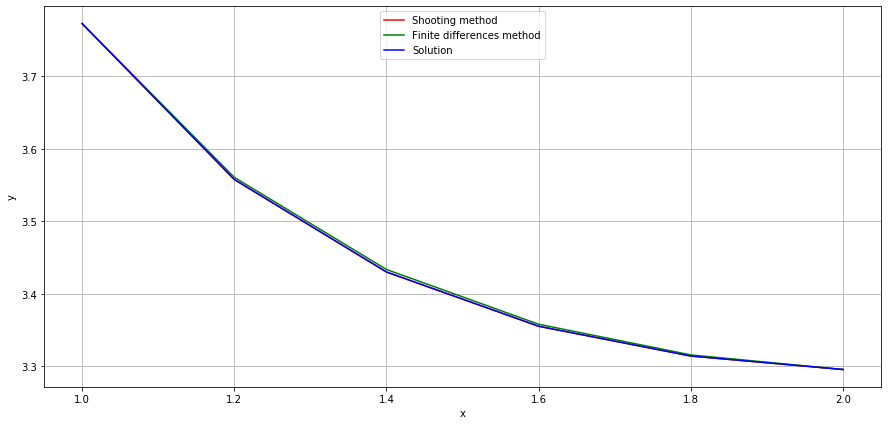

In [12]:
solution = []
for i in x:
    solution.append(y_x(i))

fig = plt.figure(figsize=(15, 7))

plt.plot(x, y,'r', label = 'Shooting method')
plt.plot(x, yd,'g', label = 'Finite differences method')
plt.plot(x, solution,'b', label = 'Solution')

plt.xlabel('x')
plt.ylabel('y')

plt.grid()
plt.legend(loc='upper center')